In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error


In [2]:
df=pd.read_csv("C:/Users/nithi/Downloads/assignments/anomadata/creditcard.csv")

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Outlier Detection


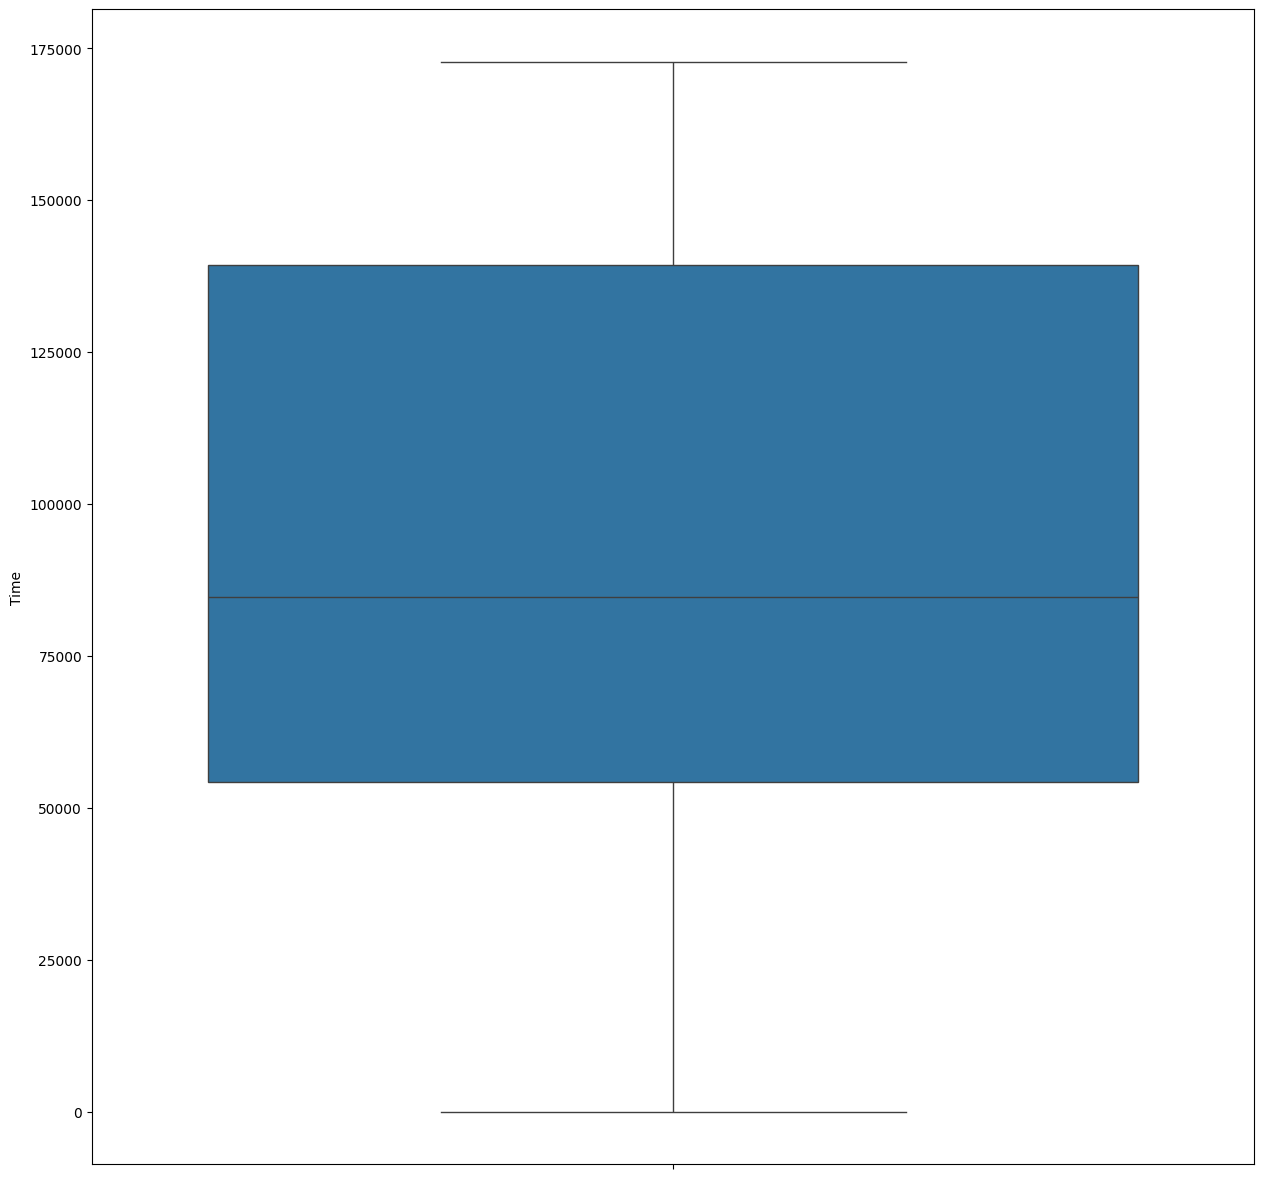

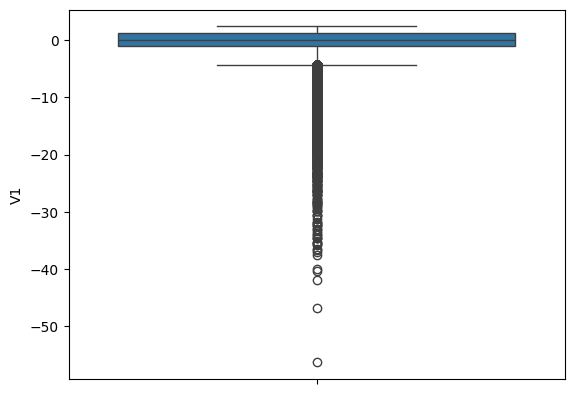

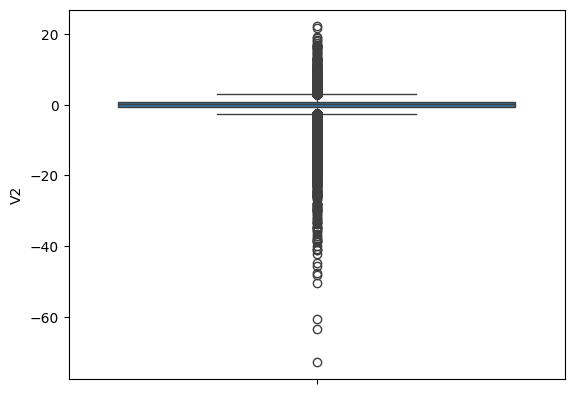

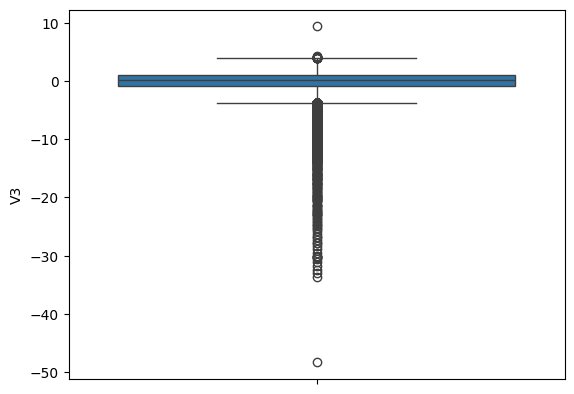

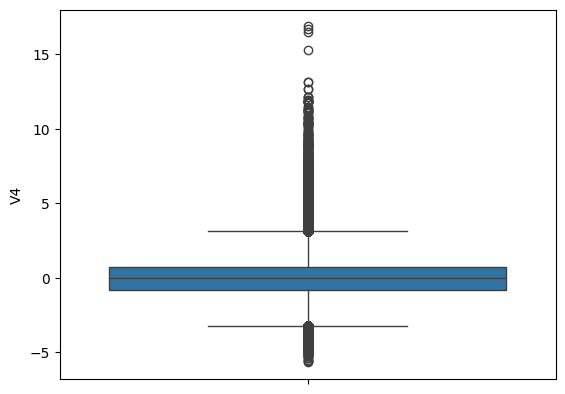

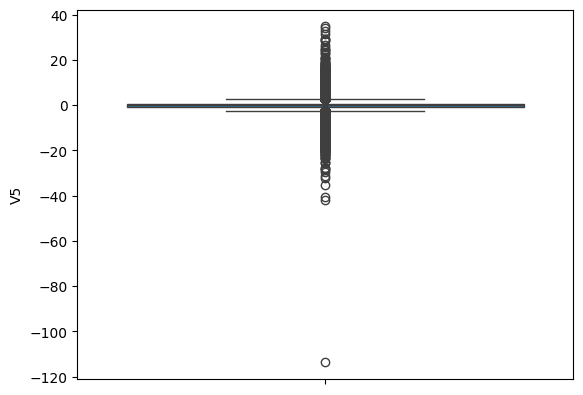

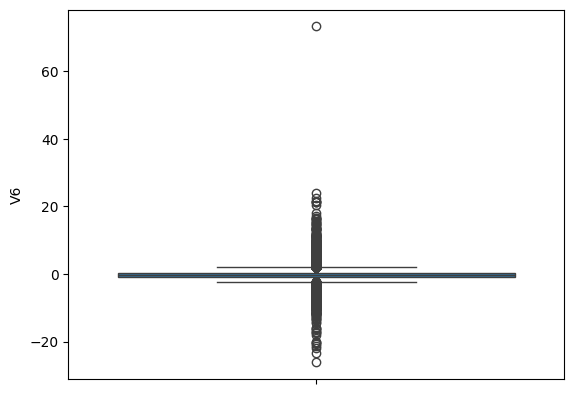

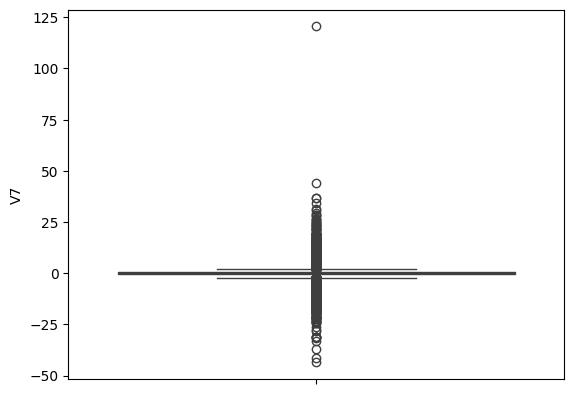

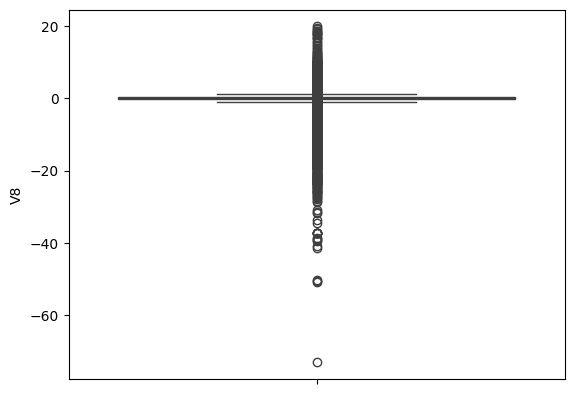

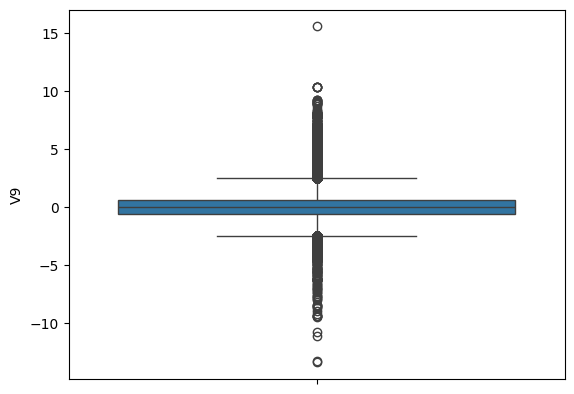

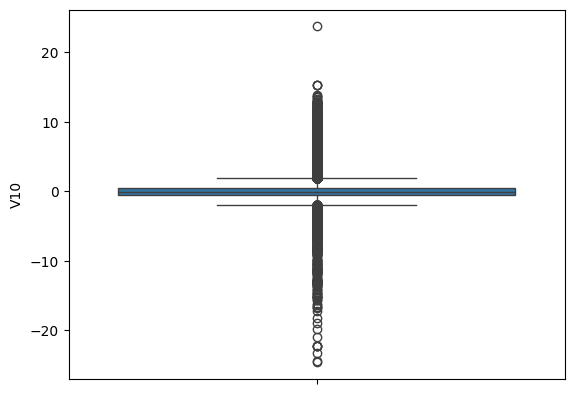

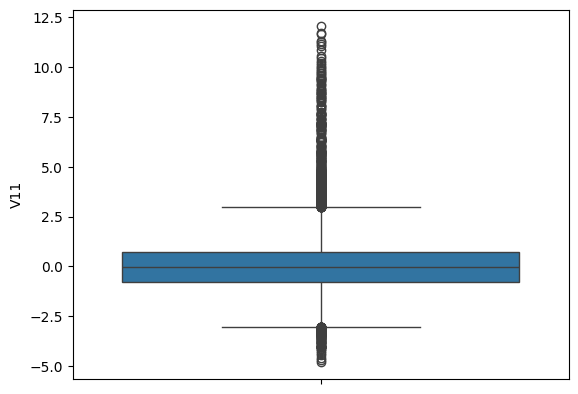

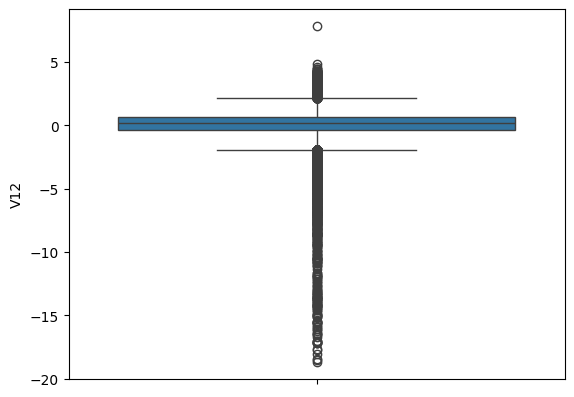

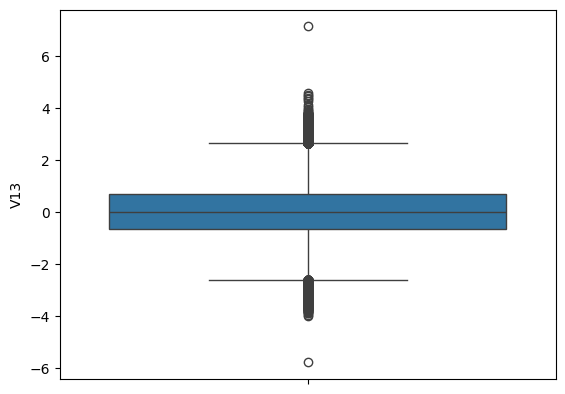

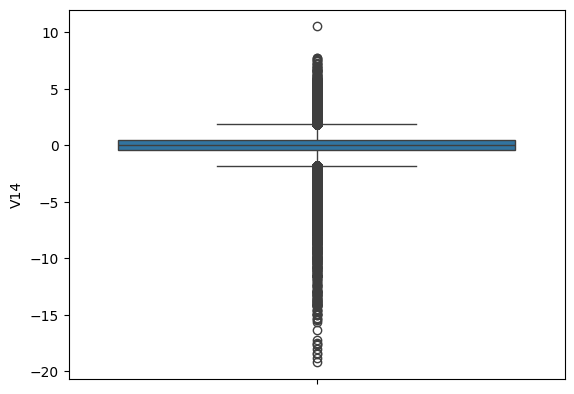

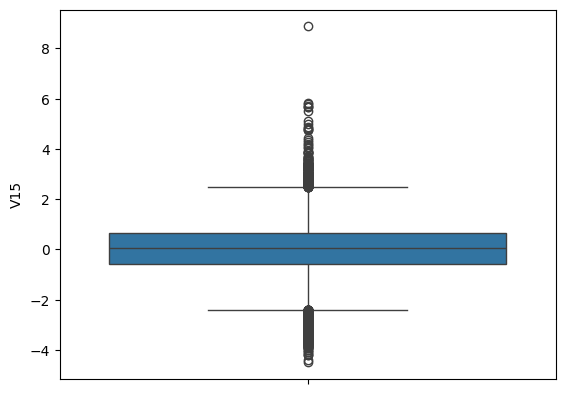

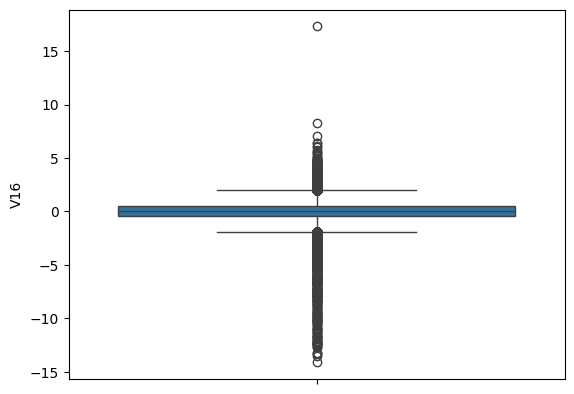

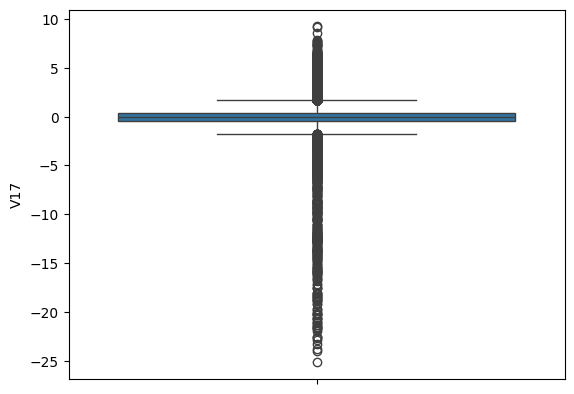

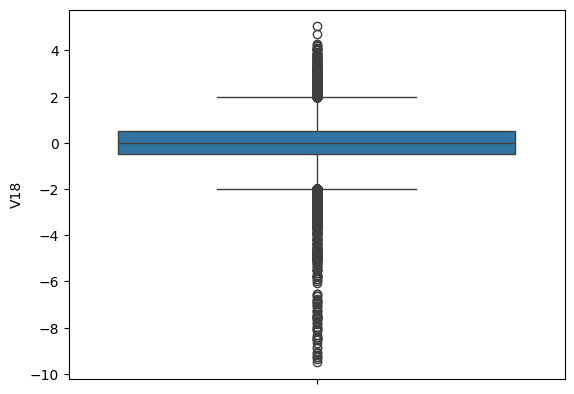

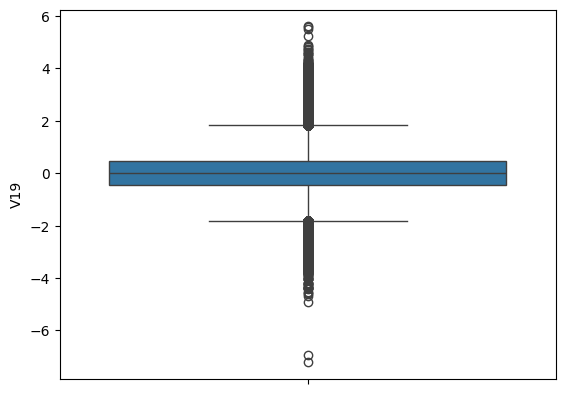

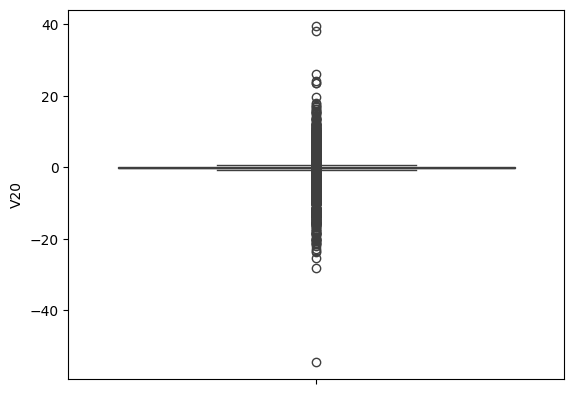

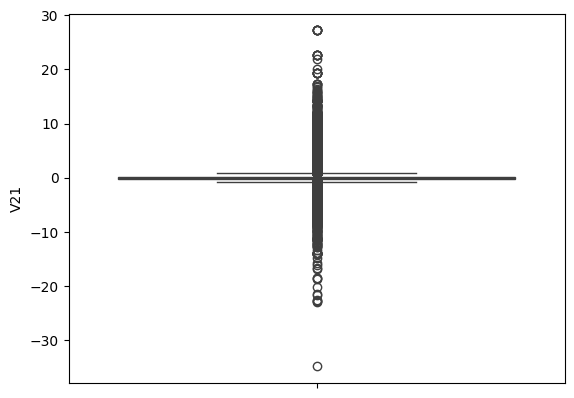

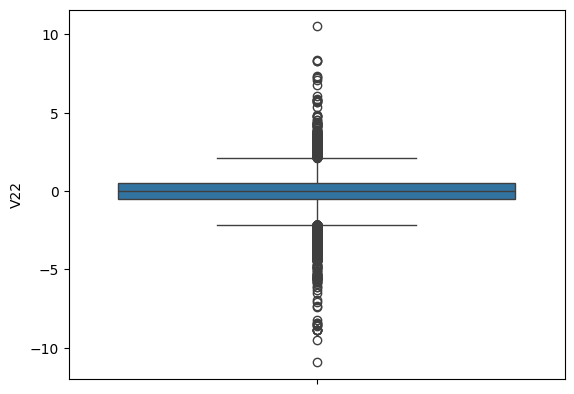

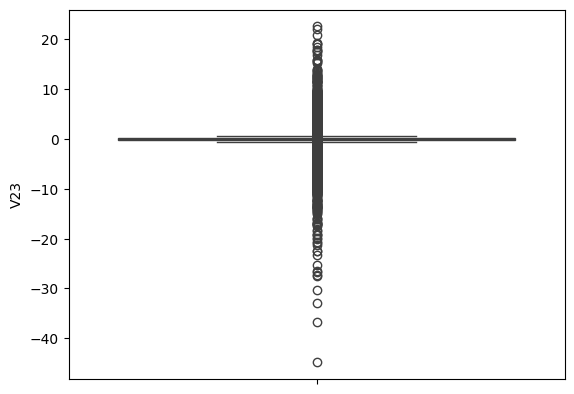

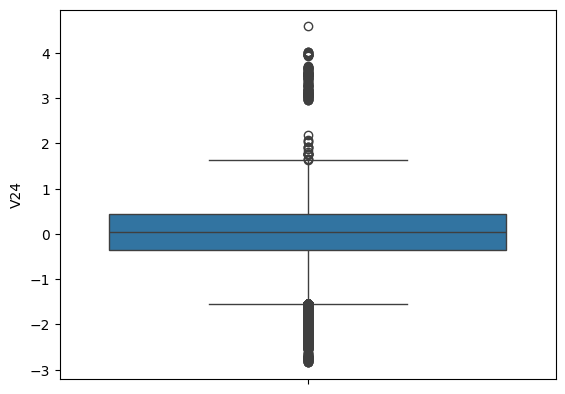

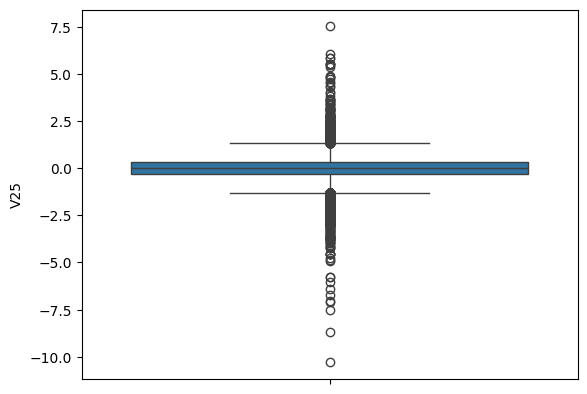

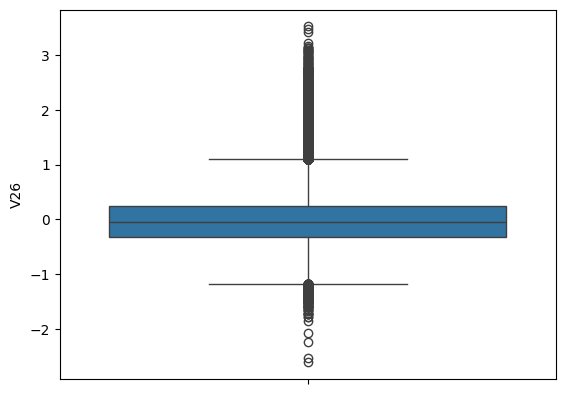

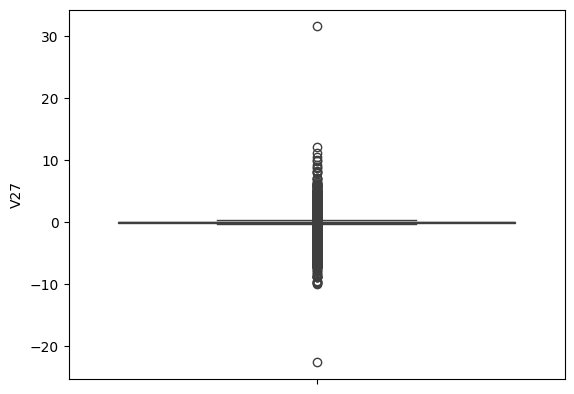

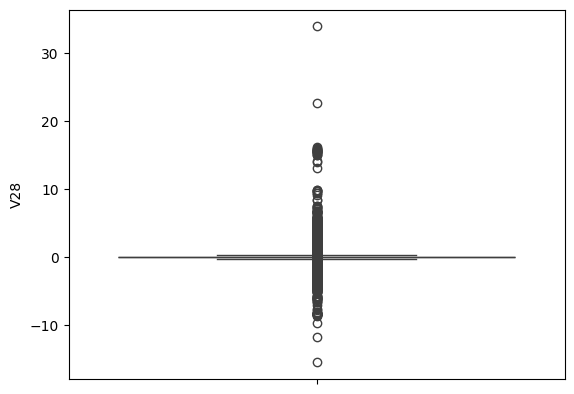

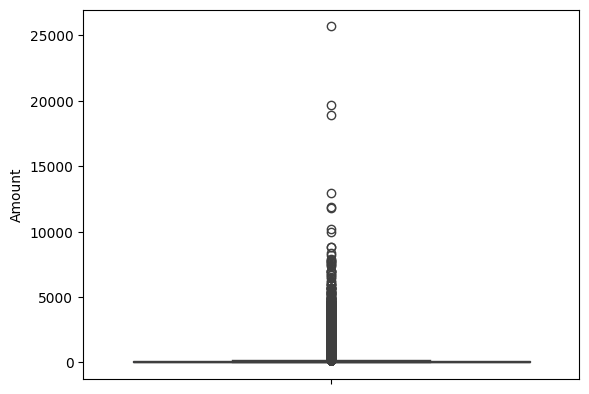

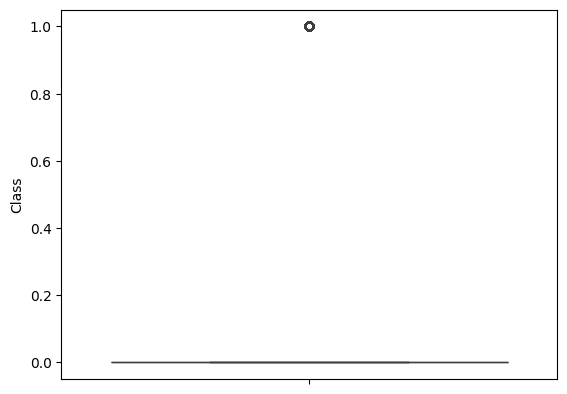

In [7]:
plt.figure(figsize=(15,15))
for x in df.columns:
    sns.boxplot(df[x])
    plt.show()

In [7]:
#Winsorization 

In [3]:
capped_df=df.copy()
for x in df.columns[:-1]:  
    q3 = df[x].quantile(0.75)  
    q1 = df[x].quantile(0.25)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    capped_df[x] = np.where(df[x]> upper_limit, upper_limit,
                        np.where(df[x]< lower_limit, lower_limit,
                          df[x]))
    print(x)
    print(q3)
    print(q1) 
    print(IQR)
    print(lower_limit)
    print(upper_limit)

Time
139320.5
54201.5
85119.0
-73477.0
266999.0
V1
1.315641694
-0.920373384
2.236015078
-4.274396001
4.669664311
V2
0.8037238714999999
-0.598549913
1.4022737845
-2.7019605897499996
2.9071345482499997
V3
1.0271955425
-0.890364838
1.9175603804999999
-3.76670540875
3.90353611325
V4
0.7433412895
-0.848640116
1.5919814055
-3.2366122242499995
3.1313133977499996
V5
0.6119264394999999
-0.691597071
1.3035235104999998
-2.6468823367499996
2.5672117052499996
V6
0.3985648965
-0.7682956085
1.166860505
-2.518586366
2.148855654
V7
0.570436073
-0.554075879
1.124511952
-2.240843807
2.257204001
V8
0.327345862
-0.208629744
0.535975606
-1.012593153
1.1313092710000001
V9
0.5971390305
-0.64309757
1.2402366004999998
-2.5034524707499997
2.4574939312499997
V10
0.45392344500000004
-0.5354257265
0.9893491715
-2.01944948375
1.9379472022500002
V11
0.739593407
-0.7624941955
1.5020876025
-3.0156255992500003
2.9927248107500004
V12
0.6182380325
-0.4055714855
1.023809518
-1.9412857624999997
2.1539523094999997
V13
0.6625

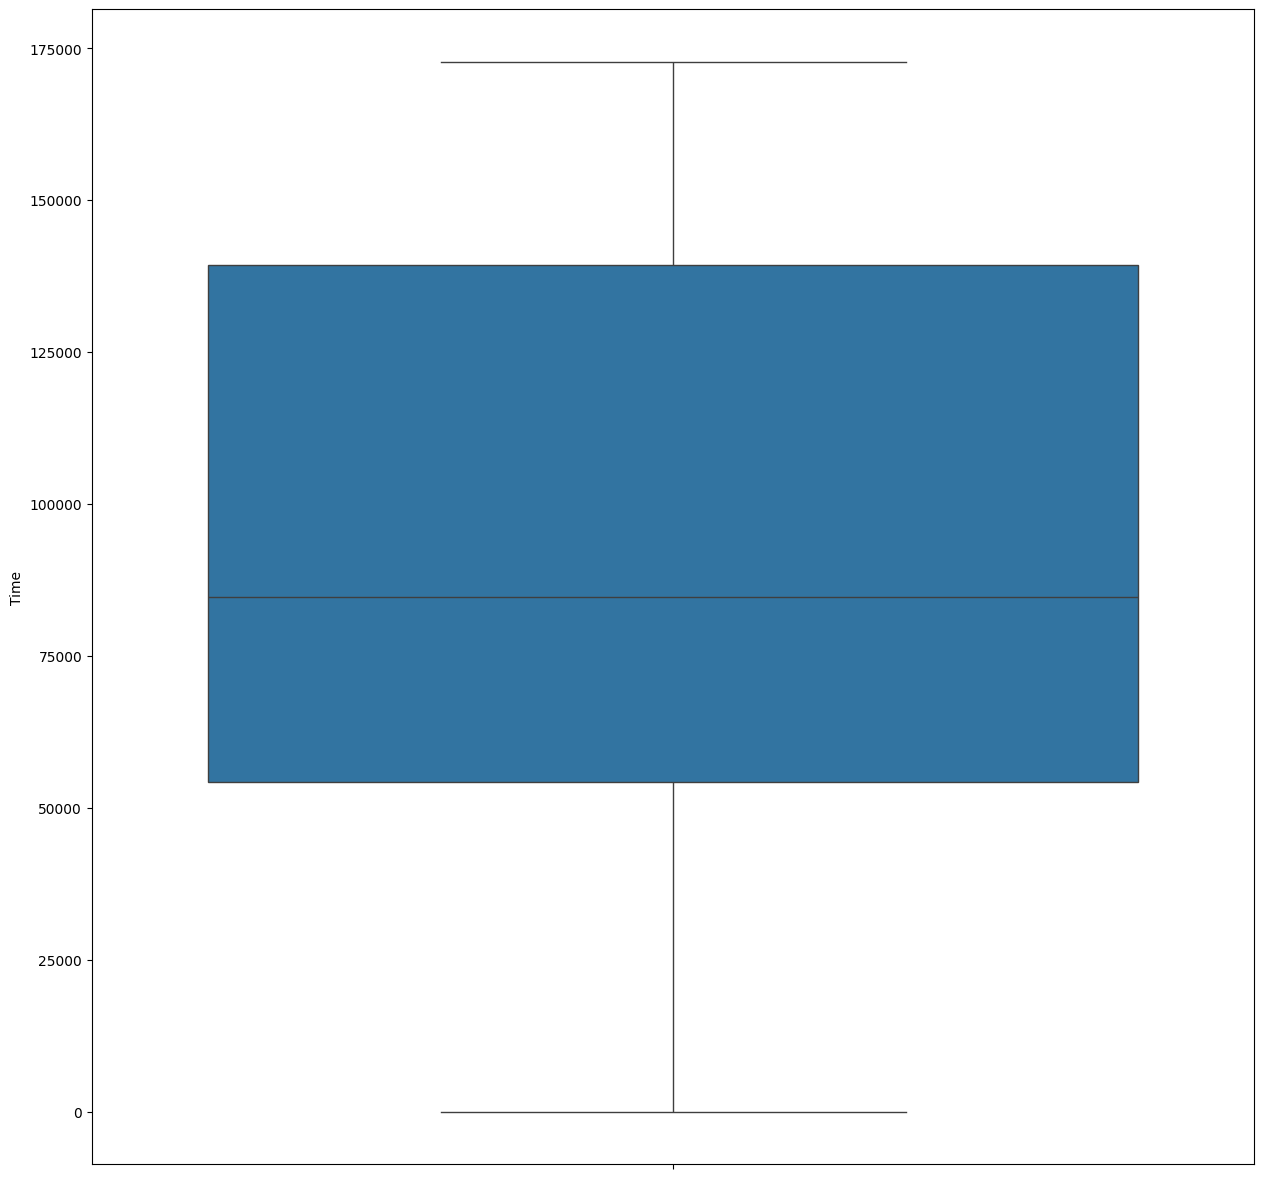

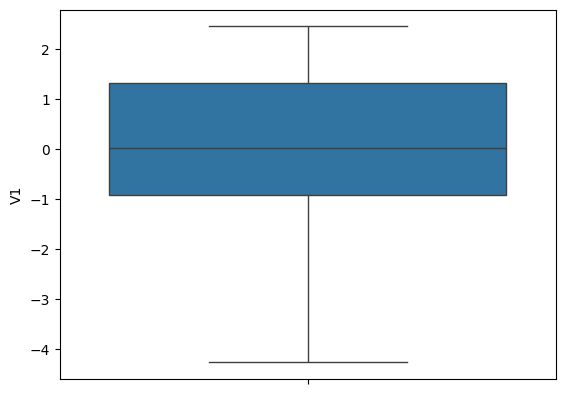

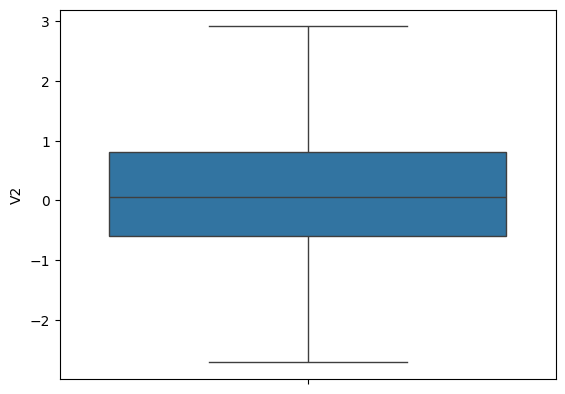

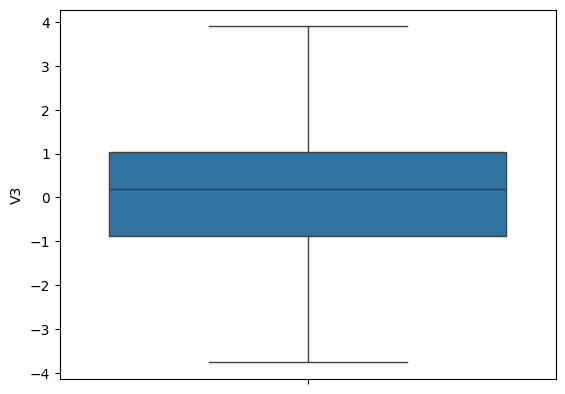

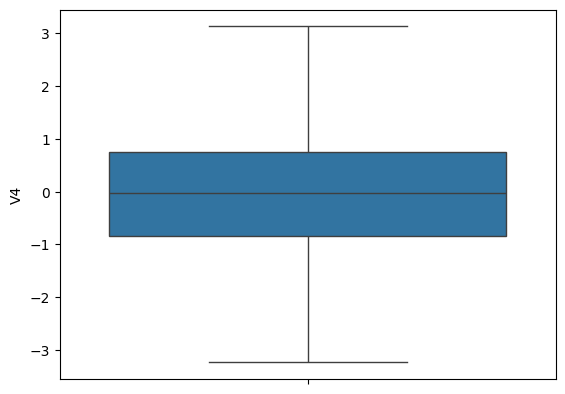

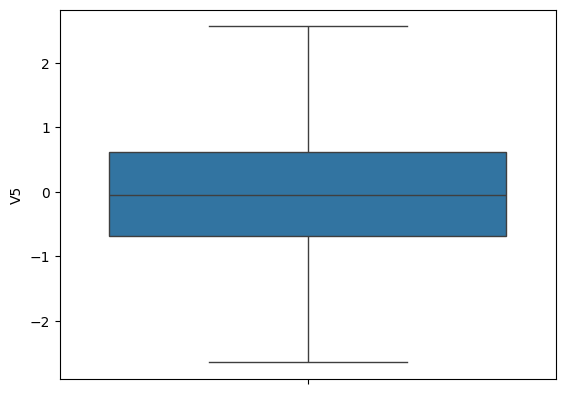

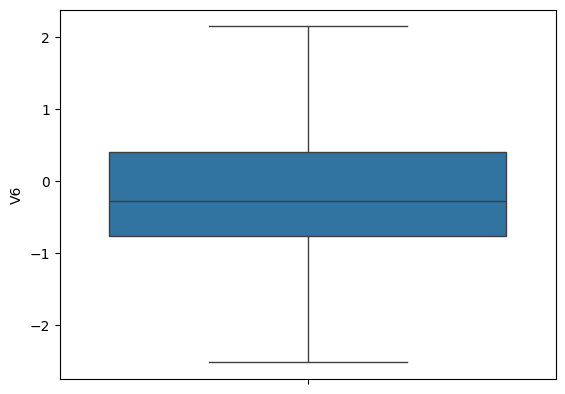

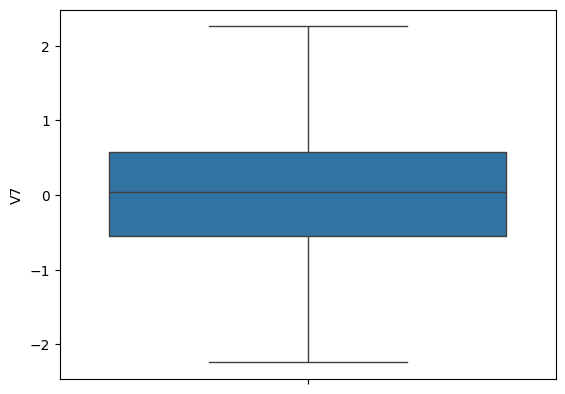

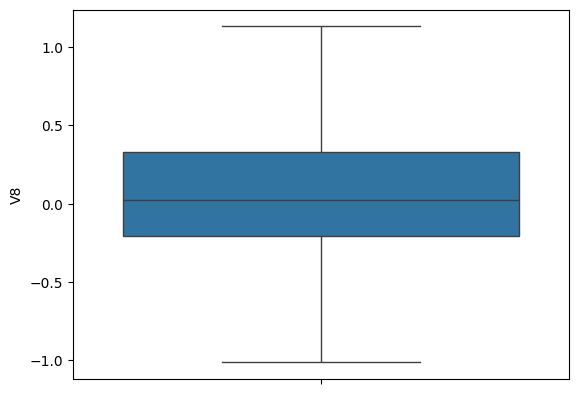

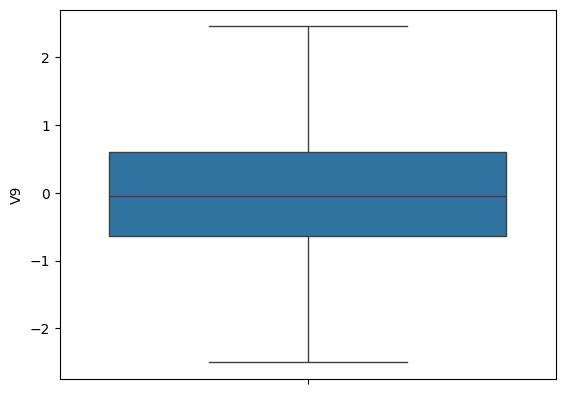

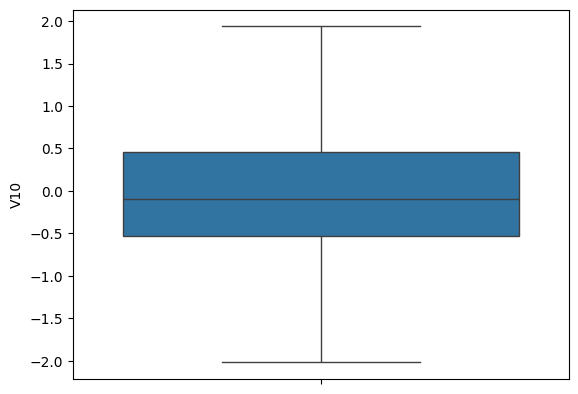

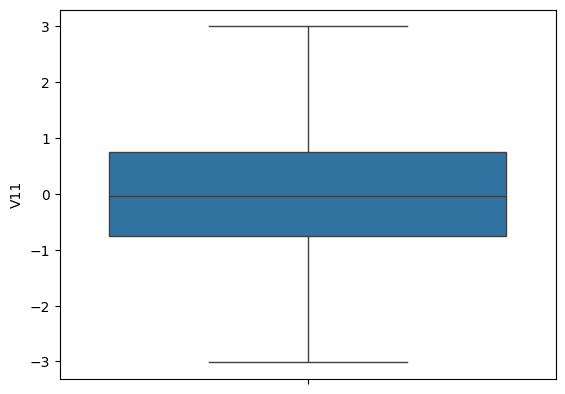

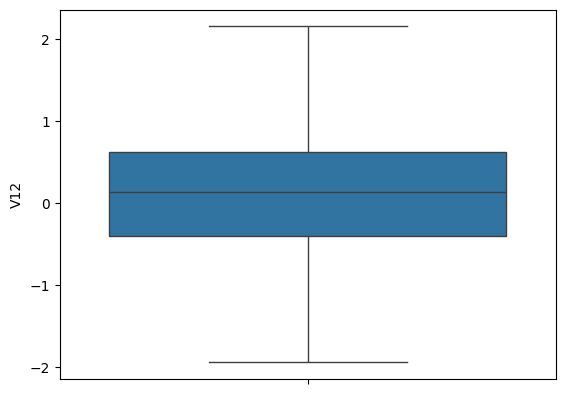

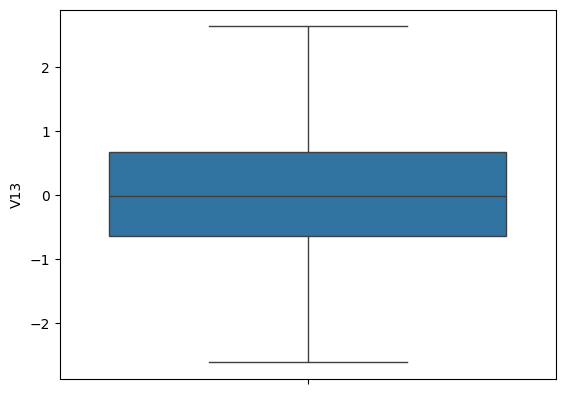

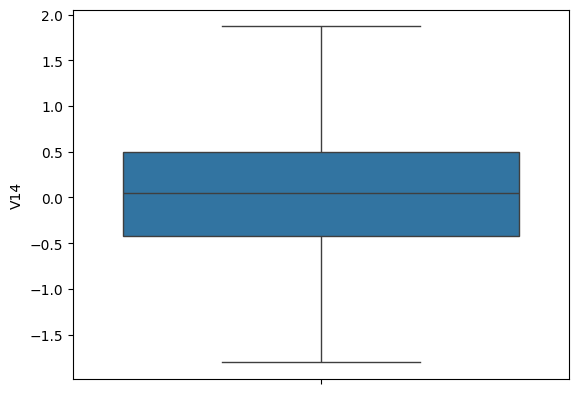

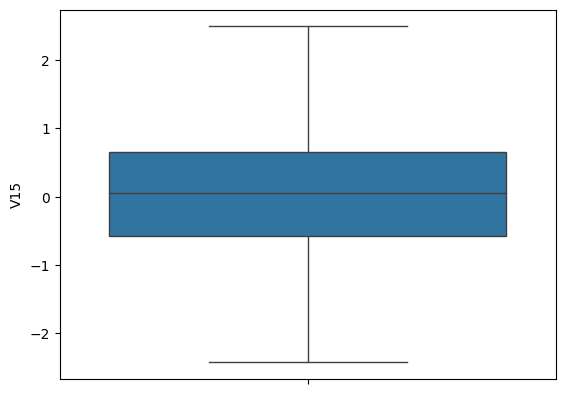

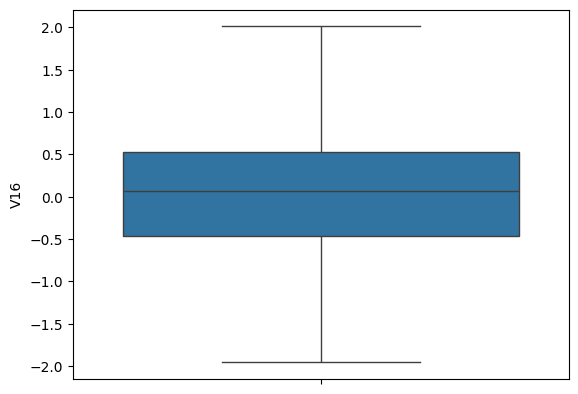

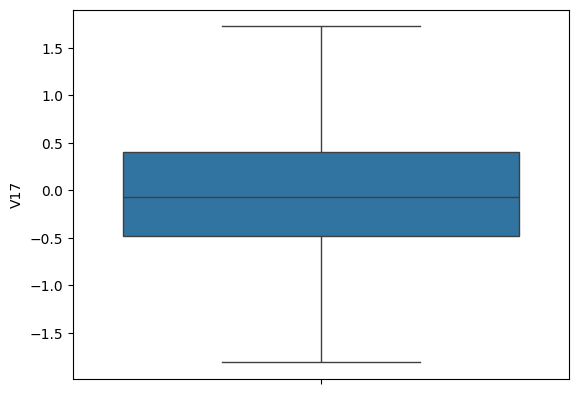

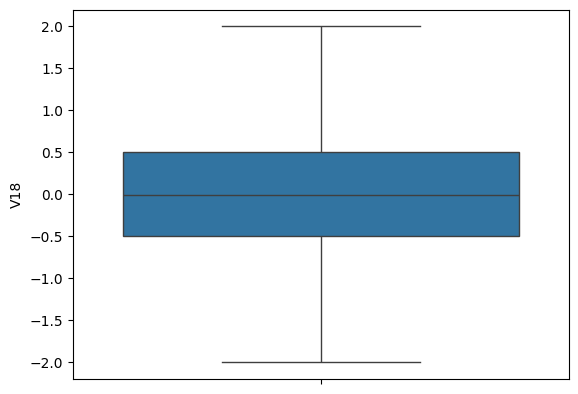

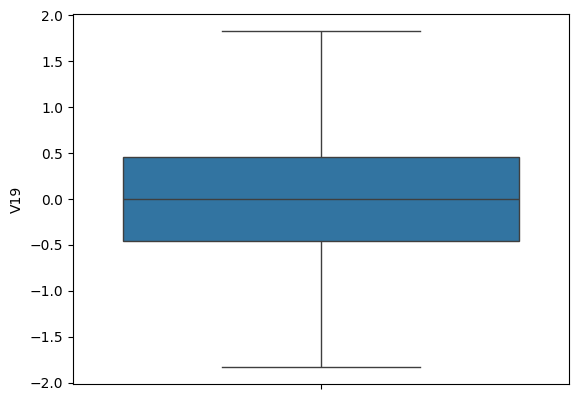

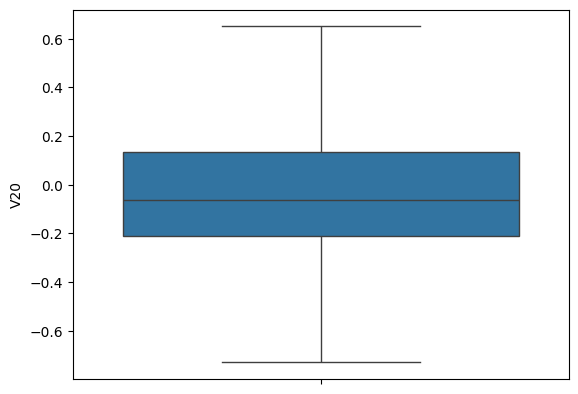

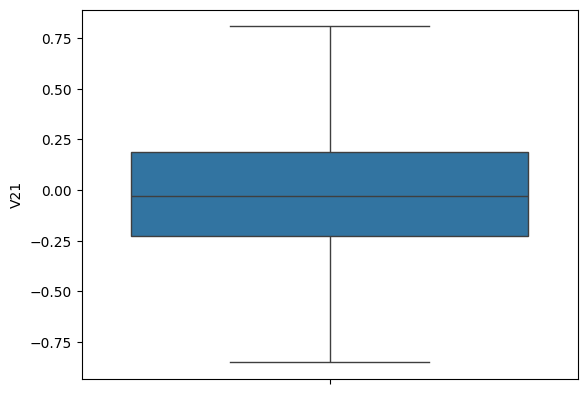

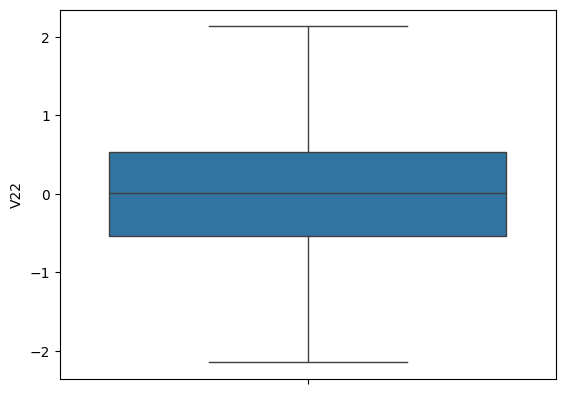

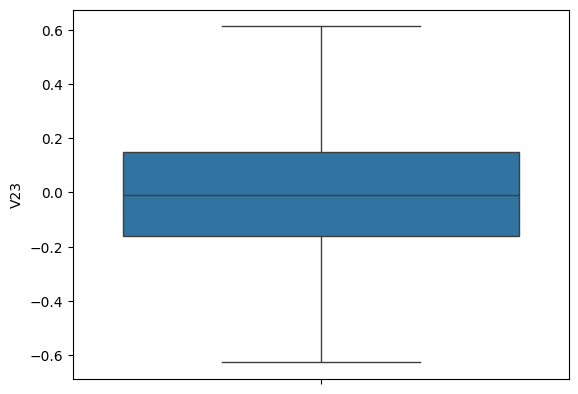

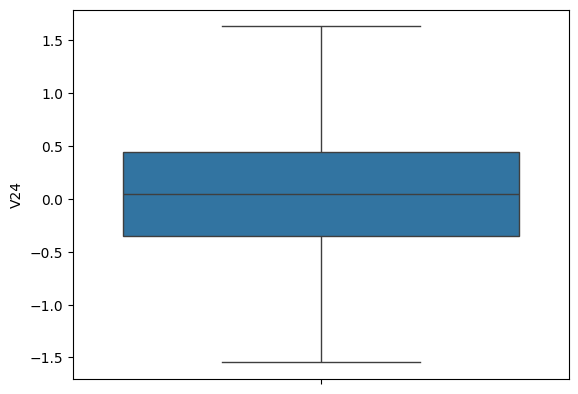

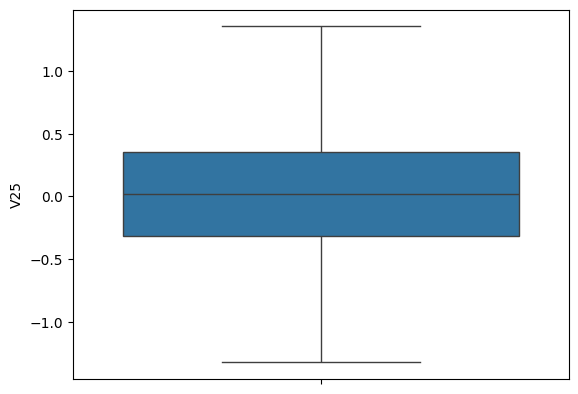

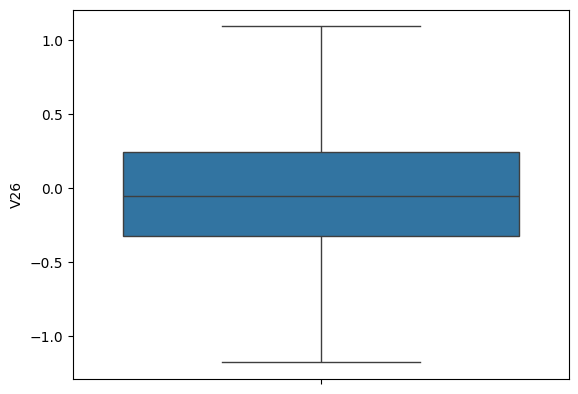

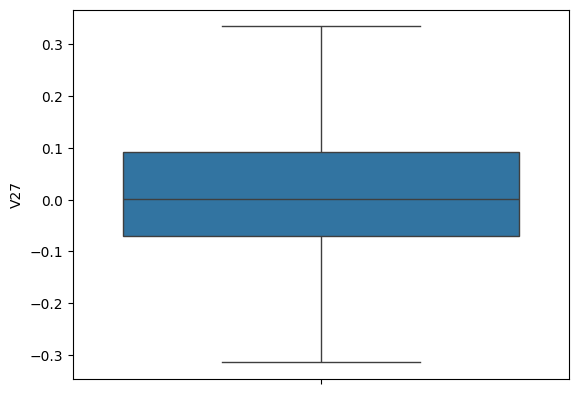

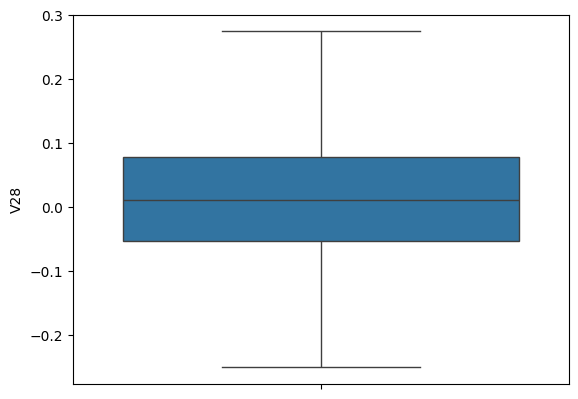

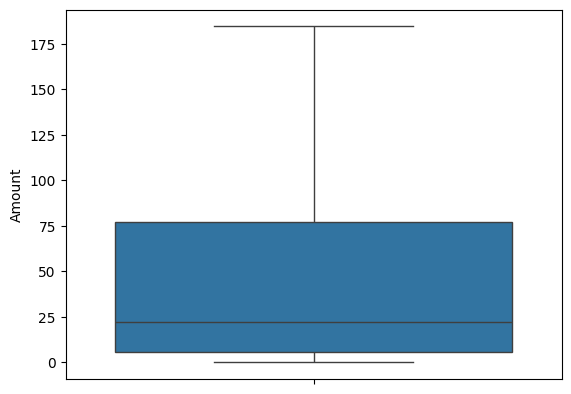

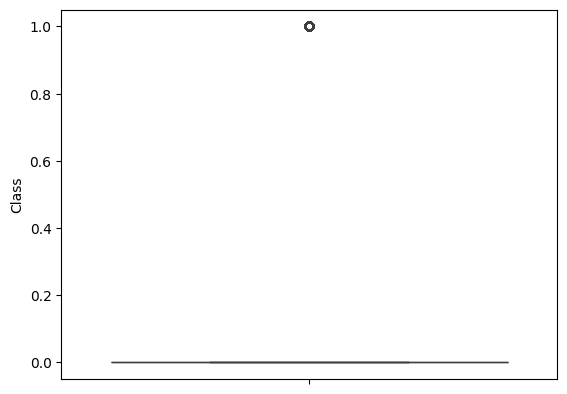

In [10]:
plt.figure(figsize=(15,15))
for x in df.columns:
    sns.boxplot(capped_df[x])
    plt.show()

In [11]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
X=capped_df.drop(columns=['Class'])
y=capped_df['Class']

In [5]:
oversample = SMOTE(sampling_strategy=0.4)
X, y = oversample.fit_resample(X, y)

In [6]:
y.value_counts()

Class
0    284315
1    113726
Name: count, dtype: int64

In [15]:
capped_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.6200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.6900,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,184.5125,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-4.274396,2.907135,-3.766705,-2.066656,-2.646882,-2.518586,-2.240844,1.131309,1.914428,...,0.213454,0.111864,0.611875,-0.509348,1.352506,0.250034,0.333872,0.275140,0.7700,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.7900,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.567212,2.148856,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.8800,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0000,0


In [6]:
scaler = MinMaxScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Print the scaled data
print(X_scaled)

[[0.00000000e+00 4.33117502e-01 4.68735037e-01 ... 6.90653626e-01
  4.35779490e-01 8.10893571e-01]
 [0.00000000e+00 8.12303211e-01 5.29160449e-01 ... 4.70525472e-01
  5.03931903e-01 1.45789581e-02]
 [5.78730497e-06 4.33333434e-01 2.42783815e-01 ... 3.98916312e-01
  3.62061755e-01 1.00000000e+00]
 ...
 [5.58460116e-01 9.62574976e-02 1.00000000e+00 ... 2.67984520e-01
  5.47875384e-01 9.64532556e-02]
 [3.36907033e-01 5.69622939e-01 7.12576512e-01 ... 1.99948209e-01
  2.51765458e-01 2.72670236e-02]
 [9.72587403e-01 3.98242013e-01 8.61473399e-01 ... 9.74705474e-01
  6.98933892e-01 1.00000000e+00]]


In [7]:
from sklearn.decomposition import PCA


# Create a PCA object
pca = PCA(0.9)

# Fit the PCA object to the data
pca.fit(X_scaled)

# Transform the data
X_1 = pca.transform(X_scaled)

# Print the transformed data
X_1.shape

(398041, 22)

<Axes: >

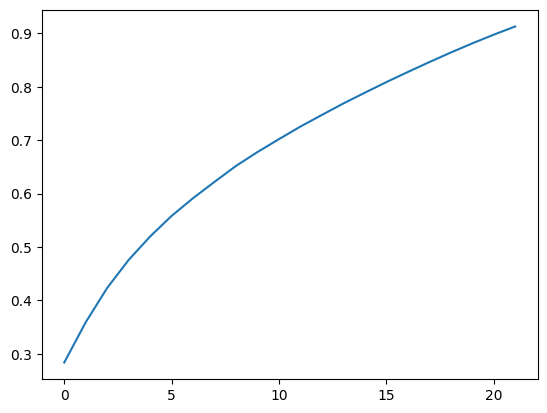

In [9]:
sns.lineplot(np.cumsum(pca.explained_variance_ratio_))

In [25]:
errors = []
for n_components in range(2,30): 
    pca=PCA(n_components)
    Xproj = pca.fit_transform(X)
    X_ = pca.inverse_transform(Xproj)
    errors.append(mean_squared_error(X_, X))
        
   

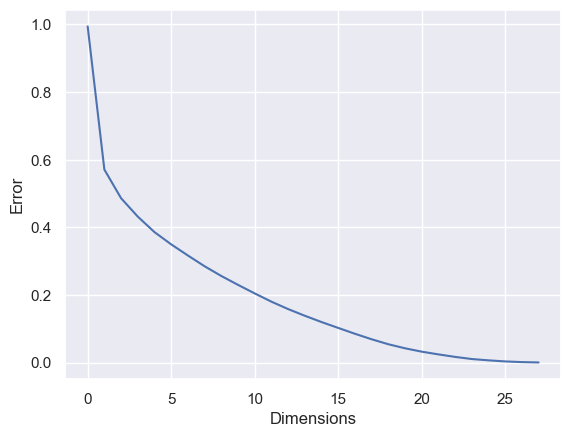

In [26]:
sns.set()
plt.xlabel('Dimensions')
plt.ylabel('Error')
plt.plot(errors);

In [8]:
X_train,X_val,y_train,y_val=train_test_split(X_1,y,test_size=0.33, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X_val,y_val,test_size=0.33, random_state=42)

In [9]:
from sklearn.svm import SVC
import tensorflow as tf
with tf.device('/device:GPU:0'):
    clf=SVC()
    clf.fit(X_train,y_train)

In [10]:
with tf.device('/device:GPU:0'):
    y_val_pred=clf.predict(X_val)

In [31]:
accuracy_score(y_val,y_val_pred)

0.9961934923945978

In [32]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93739
           1       1.00      0.99      0.99     37615

    accuracy                           1.00    131354
   macro avg       1.00      0.99      1.00    131354
weighted avg       1.00      1.00      1.00    131354



In [33]:
confusion_matrix(y_val,y_val_pred)

array([[93610,   129],
       [  371, 37244]], dtype=int64)

In [34]:
y_test_pred=clf.predict(X_test)

In [35]:
accuracy_score(y_test,y_test_pred)

0.995801324197753

In [36]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30976
           1       1.00      0.99      0.99     12371

    accuracy                           1.00     43347
   macro avg       1.00      0.99      0.99     43347
weighted avg       1.00      1.00      1.00     43347



In [37]:
confusion_matrix(y_test,y_test_pred)

array([[30927,    49],
       [  133, 12238]], dtype=int64)

In [ ]:
clf.get_params()

# Hyperparameter Training

In [ ]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    # Fit the model to the data
grid_search.fit(X_train, y_train)
    # Get the best model
best_model = grid_search.best_estimator_
    # Print the best model's parameters
print(best_model.get_params())





